In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [13]:
testing_data <- read_csv("testoutput20.csv") %>% mutate(turn = as.factor(turn))
testing_data %>% colnames()
#testing_data <- testing_data %>% mutate_all(~ ifelse(. == -Inf, NaN, .))

Rows: 73895 Columns: 260
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (260): discardPile1, discardPile2, discardPile3, discardPile4, discardPi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "discardPile1"          "discardPile2"          "discardPile3"         
  [4] "discardPile4"          "discardPile5"          "discardPile6"         
  [7] "discardPile7"          "discardPile8"          "discardPile9"         
 [10] "discardPile10"         "discardPile11"         "discardPile12"        
 [13] "discardPile13"         "discardPile14"         "player1cardNum1"      
 [16] "player1cardNum2"       "player1cardNum3"       "player1cardNum4"      
 [19] "player1cardNum5"       "player1cardNum6"       "player1cardNum7"      
 [22] "player1cardNum8"       "player1cardNum9"       "player1cardNum10"     
 [25] "player1cardNum11"      "player1cardNum12"      "player1cardNum13"     
 [28] "player1cardNum14"      "player2cardNum1"       "player2cardNum2"      
 [31] "player2cardNum3"       "player2cardNum4"       "player2cardNum5"      
 [34] "player2cardNum6"       "player2cardNum7"       "player2cardNum8"      
 [37] "player2cardNum9"       "player2cardNum10"      "player2cardNum11"     
 [40] "player2cardNum12"      "player2cardNum13"      "player2cardNum14"     
 [43] "player3cardNum1"       "player3cardNum2"       "player3cardNum3"      
 [46] "player3cardNum4"       "player3cardNum5"       "player3cardNum6"      
 [49] "player3cardNum7"       "player3cardNum8"       "player3cardNum9"      
 [52] "player3cardNum10"      "player3cardNum11"      "player3cardNum12"     
 [55] "player3cardNum13"      "player3cardNum14"      "player4cardNum1"      
 [58] "player4cardNum2"       "player4cardNum3"       "player4cardNum4"      
 [61] "player4cardNum5"       "player4cardNum6"       "player4cardNum7"      
 [64] "player4cardNum8"       "player4cardNum9"       "player4cardNum10"     
 [67] "player4cardNum11"      "player4cardNum12"      "player4cardNum13"     
 [70] "player4cardNum14"      "player5cardNum1"       "player5cardNum2"      
 [73] "player5cardNum3"       "player5cardNum4"       "player5cardNum5"      
 [76] "player5cardNum6"       "player5cardNum7"       "player5cardNum8"      
 [79] "player5cardNum9"       "player5cardNum10"      "player5cardNum11"     
 [82] "player5cardNum12"      "player5cardNum13"      "player5cardNum14"     
 [85] "player6cardNum1"       "player6cardNum2"       "player6cardNum3"      
 [88] "player6cardNum4"       "player6cardNum5"       "player6cardNum6"      
 [91] "player6cardNum7"       "player6cardNum8"       "player6cardNum9"      
 [94] "player6cardNum10"      "player6cardNum11"      "player6cardNum12"     
 [97] "player6cardNum13"      "player6cardNum14"      "board1dirties"        
[100] "board1cleans"          "board2dirties"         "board2cleans"         
[103] "board3dirties"         "board3cleans"          "board1pile4cardcount" 
[106] "board1pile4twos"       "board1pile4jokers"     "board1pile5cardcount" 
[109] "board1pile5twos"       "board1pile5jokers"     "board1pile6cardcount" 
[112] "board1pile6twos"       "board1pile6jokers"     "board1pile7cardcount" 
[115] "board1pile7twos"       "board1pile7jokers"     "board1pile8cardcount" 
[118] "board1pile8twos"       "board1pile8jokers"     "board1pile9cardcount" 
[121] "board1pile9twos"       "board1pile9jokers"     "board1pile10cardcount"
[124] "board1pile10twos"      "board1pile10jokers"    "board1pile11cardcount"
[127] "board1pile11twos"      "board1pile11jokers"    "board1pile12cardcount"
[130] "board1pile12twos"      "board1pile12jokers"    "board1pile13cardcount"
[133] "board1pile13twos"      "board1pile13jokers"    "board1pile14cardcount"
[136] "board1pile14twos"      "board1pile14jokers"    "board2pile4cardcount" 
[139] "board2pile4twos"       "board2pile4jokers"     "board2pile5cardcount" 
[142] "board2pile5twos"       "board2pile5jokers"     "board2pile6cardcount" 
[145] "board2pile6twos"       "board2pile6jokers"     "board2pile7cardcount" 
[148] "board2pile7twos"       "board2pile7jokers"     "board2pile8cardcount" 
[151] "board2pile8twos"       "board2pile8jokers"     "board2pile9cardcount" 
[154] "board2pile9twos" 

In [14]:
moves <- c('4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'pickupPileJ', 'pickupPile2', 'pickup', 'wildJ4', 'wildJ5', 'wildJ6', 'wildJ7', 'wildJ8', 'wildJ9', 'wildJ10', 'wildJ11', 'wildJ12', 'wildJ13', 'wildJ14', 'wild24', 'wild25', 'wild26', 'wild27', 'wild28', 'wild29', 'wild210', 'wild211', 'wild212', 'wild213', 'wild214', 'goOut')
testing_data <- testing_data %>% mutate(move_name = moves[move+1])
testing_data$move_name <- factor(testing_data$move_name, levels = moves)

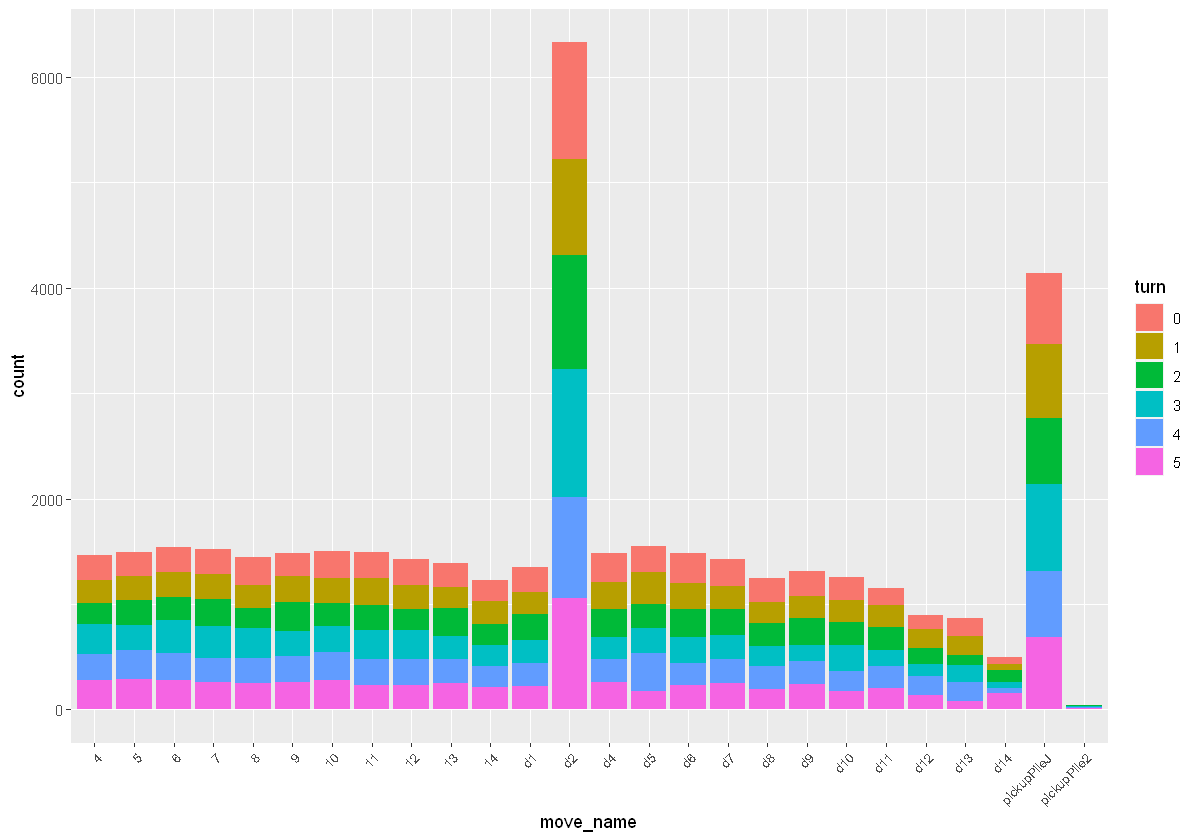

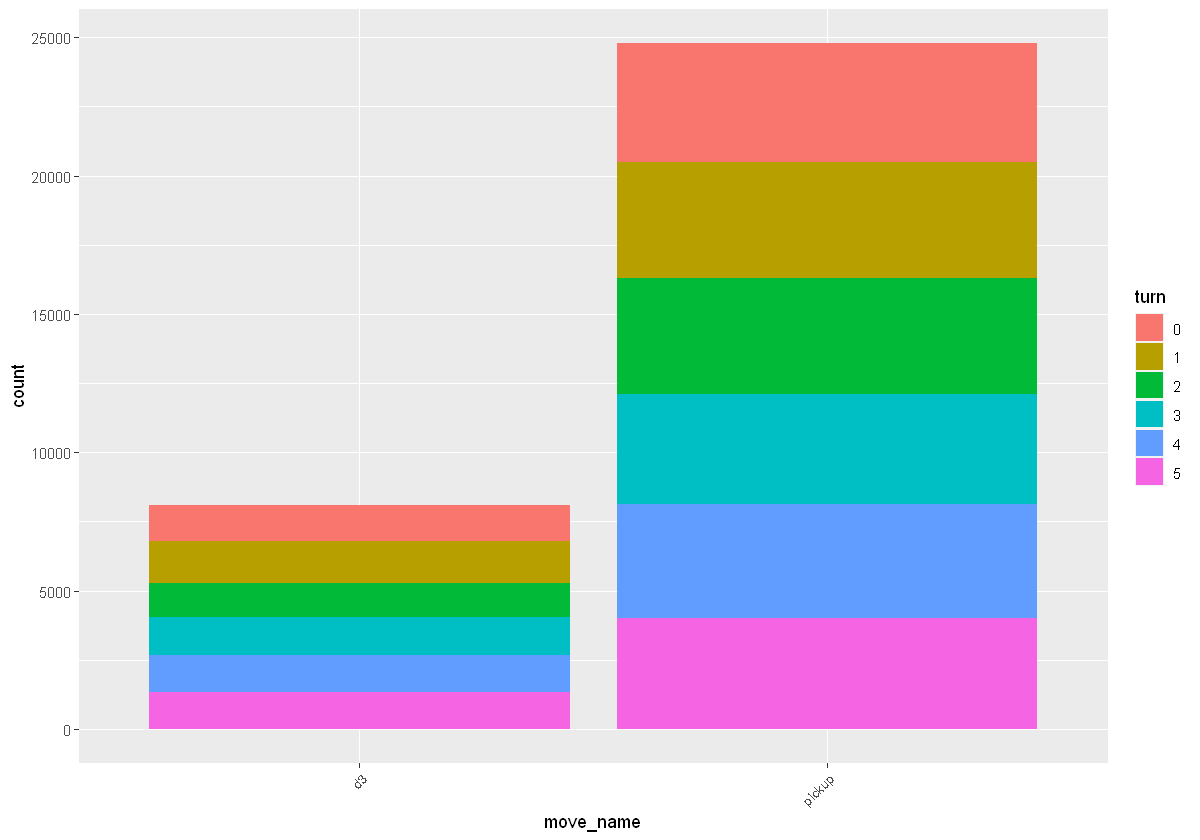

In [15]:
options(repr.plot.width = 10)
ggplot(data=testing_data %>% filter(move_name != "pickup", move_name != "d3"), aes(x = move_name, fill = turn)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1,size = 8))
ggplot(data=testing_data %>% filter(move_name == "pickup" | move_name == "d3"), aes(x = move_name, fill = turn)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1,size = 8))

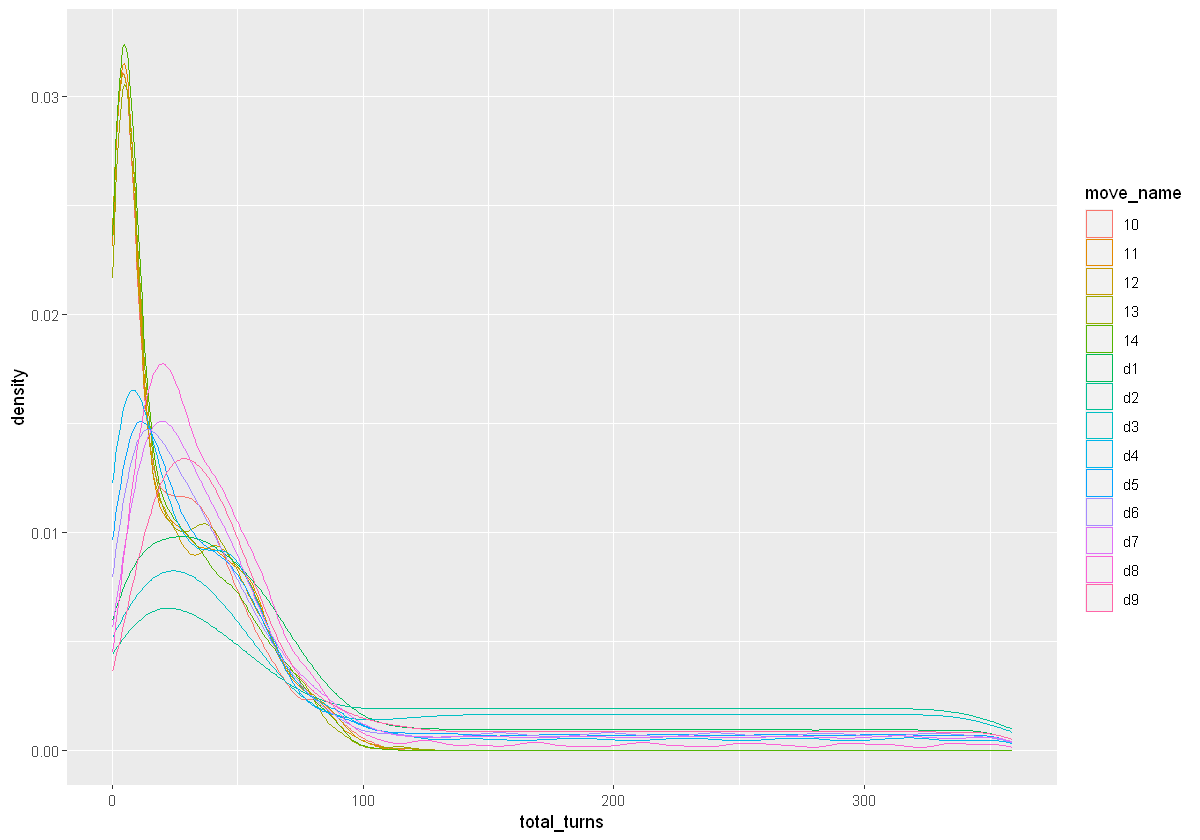

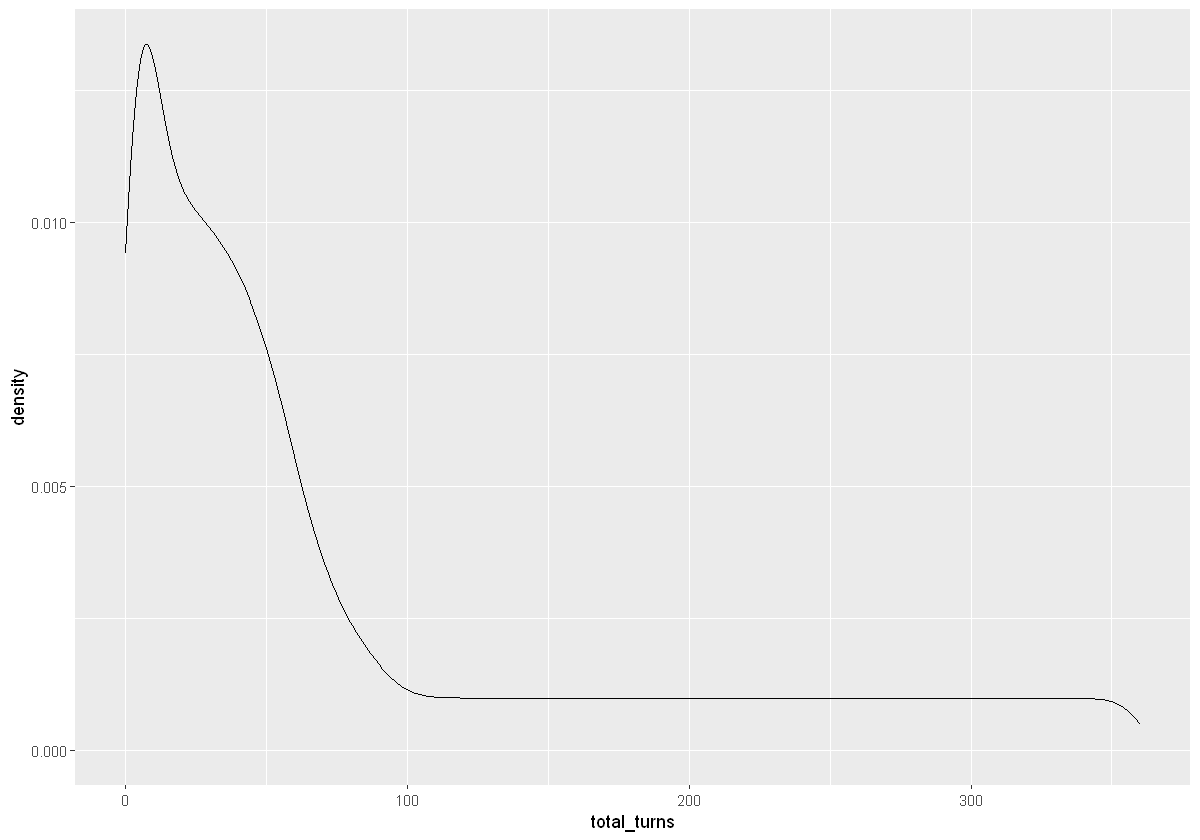

In [16]:
ggplot(data=testing_data %>% filter(nchar(as.character(move_name)) == 2)) + geom_density(aes(x=total_turns,color=move_name))
ggplot(data=testing_data) + geom_density(aes(x=total_turns))

In [12]:
testing_data %>% filter(move_name == "5")

discardPile1,discardPile2,discardPile3,discardPile4,discardPile5,discardPile6,discardPile7,discardPile8,discardPile9,discardPile10,⋯,q_value43,q_value44,q_value45,q_value46,q_value47,q_value48,q_value49,q_value50,q_value51,move_name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0,0,0,0,0,0,0,0,0,⋯,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,5
1,1,0,0,0,0,0,0,0,0,⋯,-Inf,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,5
0,0,0,0,0,0,0,0,0,0,⋯,0,0,-Inf,-Inf,0,0,-Inf,-Inf,-Inf,5
0,0,0,0,0,0,0,0,0,0,⋯,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,5
0,1,2,0,0,0,0,0,0,0,⋯,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,5
0,0,1,0,0,0,0,0,0,0,⋯,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,5
0,0,0,0,0,0,0,0,0,0,⋯,0,0,-Inf,-Inf,0,-Inf,0,0,-Inf,5
0,0,0,0,0,0,0,0,0,0,⋯,-Inf,-Inf,-Inf,-Inf,0,0,-Inf,-Inf,-Inf,5
0,0,0,0,0,0,0,0,0,0,⋯,0,-Inf,0,-Inf,-Inf,0,-Inf,-Inf,-Inf,5
